# Задача 1


Постройте график  
Назовите график  
Сделайте именование оси x и оси y  
Сделайте выводы  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

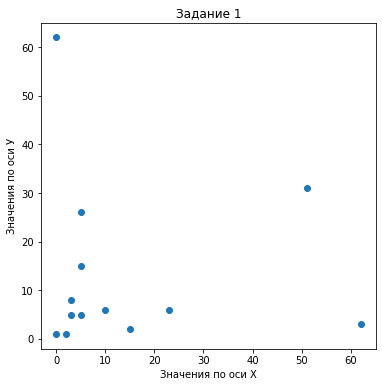

In [2]:
plt.figure(figsize=(6, 6))
plt.scatter([0,5,10,15,23,62,5,51,2,3,0,3,5], [1,15,6,2,6,3,26,31,1,5,62,8,5])
plt.xlabel('Значения по оси Х')
plt.ylabel('Значения по оси У')
plt.title('Задание 1');

## 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/esratmaria/house-price-dataset-with-other-information

In [3]:
data = pd.read_csv('./kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1.2 Изучите стоимости недвижимости

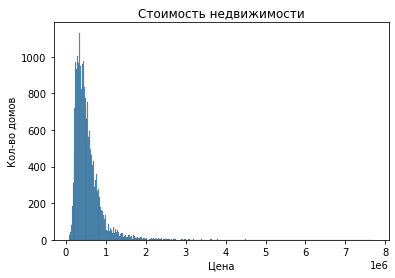

In [4]:
plt.figure(figsize=(6, 4))

# plt.hist(data['price'])
sns.histplot(data['price'])

plt.title('Cтоимость недвижимости')
plt.xlabel('Цена')
plt.ylabel('Кол-во домов');

## 1.3 Изучите распределение квадратуры жилой


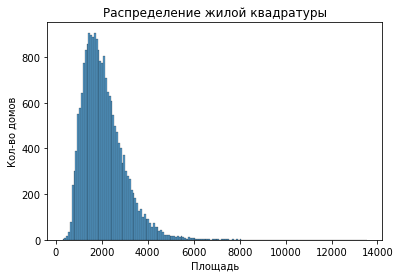

In [5]:
# plt.hist(data['sqft_living'])
sns.histplot(data['sqft_living'])

plt.title('Распределение жилой квадратуры')
plt.xlabel('Площадь')
plt.ylabel('Кол-во домов');

## 1.4 Изучите распределение года постройки

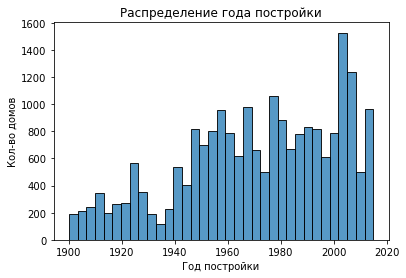

In [6]:
# plt.hist(data['yr_built'])
sns.histplot(data['yr_built'])

plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во домов');

# Задача 2

## 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график  
Сделайте выводы

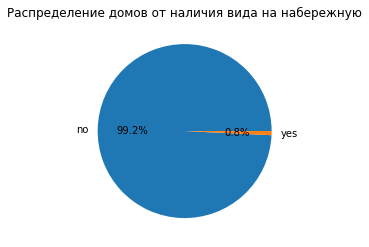

In [7]:
data.loc[data['waterfront'] == 0, 'waterfront'] = 'no'
data.loc[data['waterfront'] == 1, 'waterfront'] = 'yes'
plt.pie(data['waterfront'].value_counts().values, autopct= '%1.1f%%', labels= data['waterfront'].value_counts().index)
# sns.histplot(data['waterfront'])
plt.title('Распределение домов от наличия вида на набережную');

## 2.2 Изучите распределение этажей домов

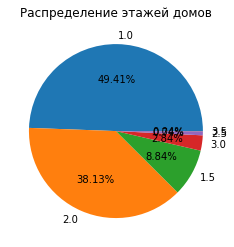

In [8]:
plt.pie(data['floors'].value_counts().values, autopct= '%1.2f%%', labels= data['floors'].value_counts().index)
plt.title('Распределение этажей домов');

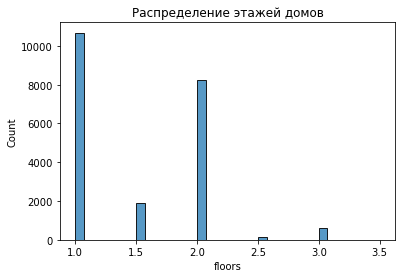

In [9]:
sns.histplot(data['floors'])
plt.title('Распределение этажей домов');

# Задача 3  

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [10]:
corr_matrix = data.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix['price']

id               0.0
price            1.0
bedrooms         0.3
bathrooms        0.5
sqft_living      0.7
sqft_lot         0.0
floors           0.3
view             0.4
condition        0.0
grade            0.7
sqft_above       0.6
sqft_basement    0.3
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.3
long             0.0
sqft_living15    0.6
sqft_lot15       0.0
Name: price, dtype: float64

Видно характеристики, которые влияют на стоимость недвижимости: sqft_living, grade, sqft_above, bathrooms и совсем незначительно view

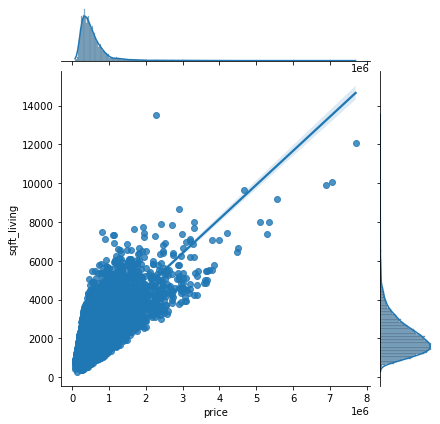

In [11]:
sns.jointplot(x=data['price'], y=data['sqft_living'], kind='reg');

Чем больше площадь дома, тем выше стоимость. Однако есть явный выброс средняя стоимость дома с наибольшей площадью около 14000

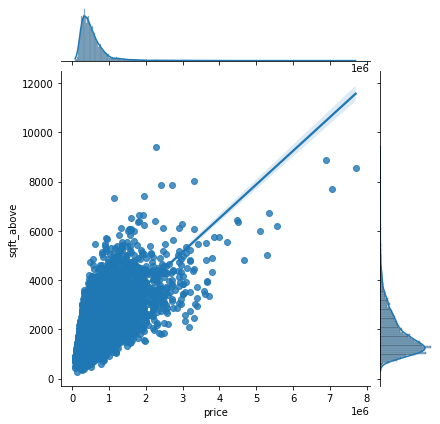

In [12]:
sns.jointplot(x=data['price'], y=data['sqft_above'], kind='reg');

Зависимости sqft_living, sqft_above от price очень похожи.

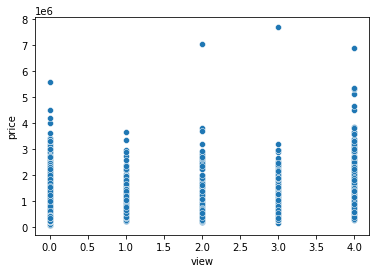

In [18]:
sns.scatterplot(x=data['view'], y=data['price']);

Матрица корреляции показала зависимость вида от стоимости дома = 0,4, но по графику видно, что стоимость пркатически не зависит от вида. Возможно такая корреляция возникла из-за выбросов.

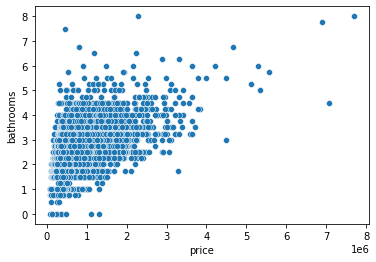

In [20]:
sns.scatterplot(x=data['price'], y=data['bathrooms']);

В среднем количество ванных комнат влияет на стоимость жилья. 

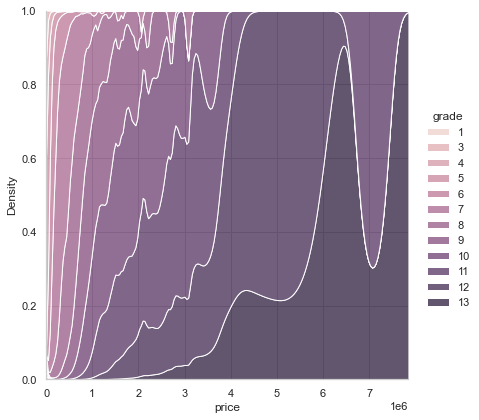

In [14]:
sns.set_theme(style="whitegrid")

sns.displot(
    data=data,
    x="price", hue="grade",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    warn_singular=False,
);

Дома с высокой оценкой имеют высокую стоимость